In [42]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical

# cargar los datos
df = pd.read_csv("./datasets/unbalanced_1000.csv", header=None)

# separar las características (X) y la etiqueta (y)
X = df.drop(columns=343, axis=1)
y = df.iloc[:, 343]

# codificar la etiqueta (y)
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)

# Convierte las etiquetas a codificación one-hot
y_one_hot = to_categorical(y, num_classes=10)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [52]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [56]:
# Calcula los pesos de las clases
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=list(range(0, 10)), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [59]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=343, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=60, validation_data=(X_test, y_test),
                    class_weight=class_weight_dict)


Epoch 1/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.8039 - val_loss: 0.7210 - val_accuracy: 0.7640
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.8053 - val_loss: 0.6962 - val_accuracy: 0.7713
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7997 - val_loss: 0.6870 - val_accuracy: 0.7785
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.8079 - val_loss: 0.7117 - val_accuracy: 0.7809
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.8007 - val_loss: 0.6676 - val_accuracy: 0.7785
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.8087 - val_loss: 0.7283 - val_accuracy: 0.7681
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8071 - val_loss: 0.6891 - val_accuracy: 0.7833
Epoch 8/100
8

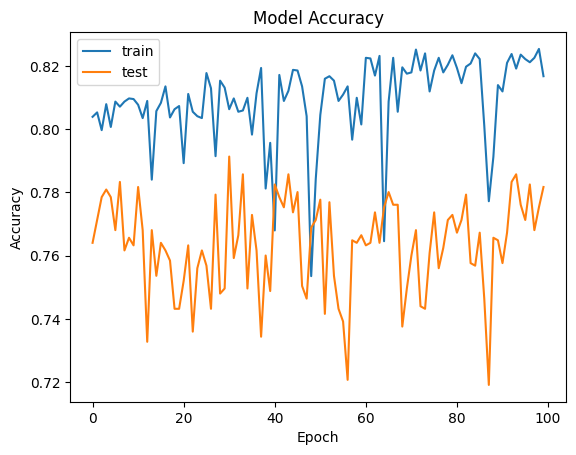

In [62]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


39/39 [==============================] - 0s 1ms/step
[[ 31   0   0   1   3   2   0   2   1   0]
 [  7  78   2   8   1   0   8   9   2   0]
 [  0   2 176   5   0   7   7   2   1   0]
 [  1   9   5 109   1   0  13   3   0   0]
 [  2   0   0   1 192   1   2   1   1   0]
 [  0   0   5   0   0  11   2   0   1   0]
 [  1   9   8   5   1   8 117   7   3  41]
 [  0   1   0   1   0   0   1  86   1   0]
 [  0   5   3   3   0   7   2   2  19   0]
 [  1   0   0   1   1   0  40   1   1 155]]


In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7209    0.7750    0.7470        40
           1     0.7500    0.6783    0.7123       115
           2     0.8844    0.8800    0.8822       200
           3     0.8134    0.7730    0.7927       141
           4     0.9648    0.9600    0.9624       200
           5     0.3056    0.5789    0.4000        19
           6     0.6094    0.5850    0.5969       200
           7     0.7611    0.9556    0.8473        90
           8     0.6333    0.4634    0.5352        41
           9     0.7908    0.7750    0.7828       200

    accuracy                         0.7817      1246
   macro avg     0.7234    0.7424    0.7259      1246
weighted avg     0.7865    0.7817    0.7819      1246



In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9063291139240506


In [17]:
from sklearn.metrics import cohen_kappa_score, classification_report

print("Cohen's kappa: ", cohen_kappa_score(y_test, y_pred))

Cohen's kappa:  0.8214416615760538


In [18]:
print("size of the splits")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.size)
print("y_pred: ", y_pred.size)

size of the splits
X_train:  (1580, 343)
X_test:  (395, 343)
y_test:  395
y_pred:  395


# Save model

In [13]:
# Save the model to a single file
model.save('./rna_unbalance.keras', save_format='keras_v3')

# Suspected Symbiotic Stars v1

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v1/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 26ms/step
[[13  1  1]
 [ 0  0  0]
 [ 0  0  0]]


In [30]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v1/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,4687286621186701568,0.8211,0.1205,0.0584,0
1,4651824725526390016,0.5211,0.4222,0.0568,0
2,3321366590173335424,0.4454,0.2368,0.3178,0
3,5410876219867043072,0.9901,0.0098,0.0001,0
4,3575939163051304192,0.9876,0.0123,0.0001,0


In [31]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v1/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,RAW 1691,LIN 521,C*,C,Gaia DR2 4687286621186701568,RAW 1691|LIN 521|2MASS J01183570-7242213|OGLE ...,C*|Em*|LP*|LP*|Em*|MIR|NIR|*|C*?|LP?,4687286621186701568
1,[BE74] 583,[BE74] 583,LongPeriodV*,G/Ke:,Gaia DR2 4651824725526390016,2MASS J05265014-7106350|EROS2-star lm058-2n-25...,LP*|Em*|NIR|V*|*,4651824725526390016
2,StHA 55,EM* StHA 55,Mira,NaN,Gaia DR3 3321366590173335424,IRAS 05440+0642|ASAS J054642+0643.7|ASAS J0546...,Mi*|LP*|V*|LP*|SB*|LP*|MIR|V*|Em*|NIR|*|C*?|IR...,3321366590173335424
3,ZZ CMi,V* ZZ CMi,LongPeriodV*,M6I-IIep,Gaia DR3 3155368612444708096,BD+09 1633|AN 306.1934|DO 2156|GCRV 4915|G...,LP*|NIR|V*|*|IR|LP?,3155368612444708096
4,WRAY 16−51,WRAY 16-51,LongPeriodV*,M4,Gaia DR2 5410876219860836224,IRAS 09316-4621|AKARI-IRC-V1 J0933295-463450|D...,LP*|NIR|MIR|Em*|PN|*|IR,5410876219867043072


In [32]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,RAW 1691,LIN 521,4687286621186701568,0.8211,0.1205,0.0584,0
1,[BE74] 583,[BE74] 583,4651824725526390016,0.5211,0.4222,0.0568,0
2,StHA 55,EM* StHA 55,3321366590173335424,0.4454,0.2368,0.3178,0
3,WRAY 16−51,WRAY 16-51,5410876219867043072,0.9901,0.0098,0.0001,0
4,NSV 05572,V* VX Crv,3575939163051304192,0.9876,0.0123,0.0001,0


In [33]:
out_name = 'rna_unbalanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v1/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)

# Suspected Symbiotic Stars v2

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v2/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 16ms/step
[[14  2  1]
 [ 0  0  0]
 [ 0  0  0]]


In [35]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v2/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,6204217186929931520,0.0228,0.9771,0.0000,1
1,4061952680197028224,0.9027,0.0866,0.0107,0
2,670455944074475008,0.5603,0.0777,0.3620,0
3,4068755633500598272,0.0082,0.0626,0.9292,2
4,2060829659152816768,0.0782,0.7818,0.1399,1


In [36]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v2/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,V748 Cen,V* V748 Cen,EclBin,Ae,Gaia DR3 6204217186929931520,CD-32 10517|ALS 18924|CRTS J145936.6-332503|CS...,EB*|Ro*|NIR|V*|Em*|*,6204217186929931520
1,WRAY 16-294,WRAY 16-294,LongPeriodV*,K5,Gaia DR2 4061952680197028224,2MASS J17391381-2538050|DENIS J173913.8-253805...,LP*|PN|NIR|Em*|*|C*?|ISM|LP?,4061952680197028224
2,DASCH J075731.1+201735,ASAS J075731+2017.6,LongPeriodV*,M0III,Gaia DR2 670455944074475008,2MASS J07573112+2017347|ASAS J075731+2017.6|DA...,SB*|LP*|NIR|V*|*|Opt,670455944074475008
3,ASAS J174600-2321.3,ASAS J174600-2321.3,LongPeriodV*_Candidate,F0I,Gaia DR2 4068755633500598272,2MASS J17460018-2321163|ASAS J174600-2321.3|ER...,NIR|V*|*|LP?,4068755633500598272
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,PlanetaryNeb_Candidate,NaN,Gaia DR2 2060829659152816768,2MASS J20155096+3730042|AKARI-IRC-V1 J2015509+...,NIR|*|C*?|IR|LP?|PN?,2060829659152816768


In [37]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,V748 Cen,V* V748 Cen,6204217186929931520,0.0228,0.9771,0.0000,1
1,WRAY 16-294,WRAY 16-294,4061952680197028224,0.9027,0.0866,0.0107,0
2,DASCH J075731.1+201735,ASAS J075731+2017.6,670455944074475008,0.5603,0.0777,0.3620,0
3,ASAS J174600-2321.3,ASAS J174600-2321.3,4068755633500598272,0.0082,0.0626,0.9292,2
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,2060829659152816768,0.0782,0.7818,0.1399,1


In [38]:
out_name = 'rna_unbalanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v2/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)